In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### INTRODUCTION

Disini saya memiliki data tentang pasien yang memiliki penyakit jantung atau tidak berdasarkan feature yang terdapat didalam data. Saya akan menggunakan data yang ada ini untuk membuat model yang akan memoredict jika seorang pasien tersebut memiliki penyakit jantung atau tidak. Disini saya akan menggunakan Logistic Regression, Random Forest dan XGBoost (classification) algoritma.

- Defining Problem (Tentukan Masalah yang Ingin Anda Pecahkan) (5 point)
- Defining Project Goals (Tentukan Tujuan dari Project Anda) (5 point)
- Describe Data - Termasuk Handling Missing Value (5 point)
- Handling Outiers / Imbalance data (5 point)
- Data Analysis (Gunakan salah satu atau beberapa pandas methods crosstab, pivot table, group by ) (10 point)
- Data Visualization (Plot yang harus ada adalah histogram dan boxplot selain yang memang anda butuhkan) (10 point)
- Insight Data setiap data analysis dan data visualization yang dilakukan (5 point)
- Data Preprocessing (Lakukan Proprocessing Data sesuai kebutuhan) (10 point)
- Feature Engineering & Feature Selection (10 point)
- Lakukan Training Model Machine Learning Minimal 3 Algoritma yang berbeda (5 point)
- Lakukan Hyper Parameter Tuning untuk ketiga algoritma yang anda pilih (5 point)
- Lakukan Evaluation Metrics dengan ketentuan : (10 Point)

### Defining Problem

Banyaknya jumlah penduduk disebuah negara menjadikan kesehatan salah satu aset paling berharga setiap orang. Banyaknya orang yang masih belum bisa menyadari pentingnya hidup sehat membuat kesehatan menjadi sangat mahal. Penyakit jantung merupakan salah satu penyakit yang paling sering bisa kita temui di sebuah negara. Banyaknya jumlah orang yang mengidap penyakit jantung ini bukan saja merugikan individu itu sendiri tapi hal tersebut juga akan berdampak merugikan pihak rumah sakit dan negara itu sendiri.

### Defining Project Goals

- Model dapat memprediksi pasien yang akan terkena penyakit jantung atau tidak
- Dengan penggunaan model ini diharapkan dapat mengurangi biaya pengobatan dari individu dan dapat mengurangi biaya sebuah negara untuk menangani penyakit jantung

### Describe Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Features;

- age -> age in years
- sex -> (1 = male; 0 = female)
- cp -> chest pain type (typical, asymtotic, nonanginal, nontypical
- trestbps -> resting blood pressure (in mm Hg on admission to the hospital)
- chol -> serum cholestoral in mg/dl
- fbs -> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg -> resting electrocardiographic results
- thalach -> maximum heart rate achieved
- exang -> exercise induced angina (1 = yes; 0 = no)
- oldpeak -> ST depression induced by exercise relative to rest
- slope -> the slope of the peak exercise ST segment
- ca -> number of major vessels (0-3) colored by flourosopy
- thal -> 3 = normal; 6 = fixed defect; 7 = reversable defect
- target -> have disease or not (1=yes, 0=no)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.size

4242

In [8]:
df.shape

(303, 14)

Dari sini bisa kita lihat data ini tidak memiliki nilai null

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [11]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [12]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [13]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [14]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [15]:
df['fbs'].unique()

array([1, 0], dtype=int64)

In [16]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [18]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [19]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [20]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

In [21]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [22]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [23]:
df['target'].unique()

array([1, 0], dtype=int64)

In [24]:
categorical_val = []
continous_val = []
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [25]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [26]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Dapat dilihat target dari data ini memiliki perbandingan data yang cukup berimbang sehingga kita tidak usah untuk melakukan metode handling imbalance data

### EDA

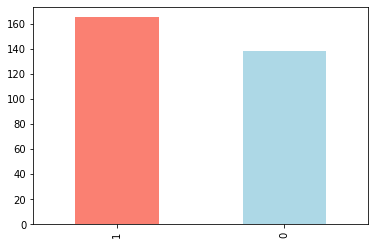

In [27]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

Dari data ini kita memiliki 165 orang dengan penyakit jantung dan 138 orang tidak memiliki penyakit jantung

In [28]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

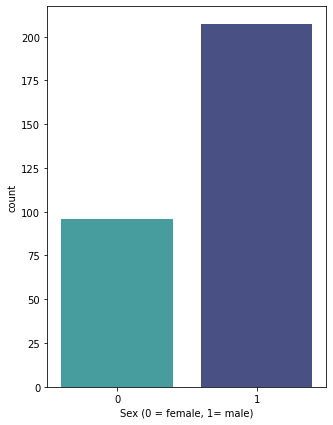

Percentage of Female Patients: 31.683168316831683%
Percentage of Male Patients: 68.31683168316832%


In [29]:
plt.figure(figsize=(5,7))
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {}%".format((countMale / (len(df.sex))*100)))

Dari data ini kita dapat mengetahui bahwa jumlah pasien pria (207) lebih banyak dibandingkan wanita (96)

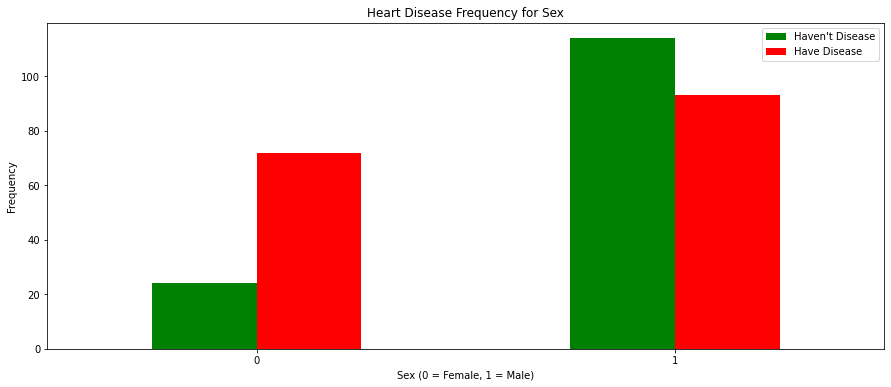

In [30]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['g','r' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [31]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Rata-rata pasien berumur 50 tahun baik itu pria atau wanita

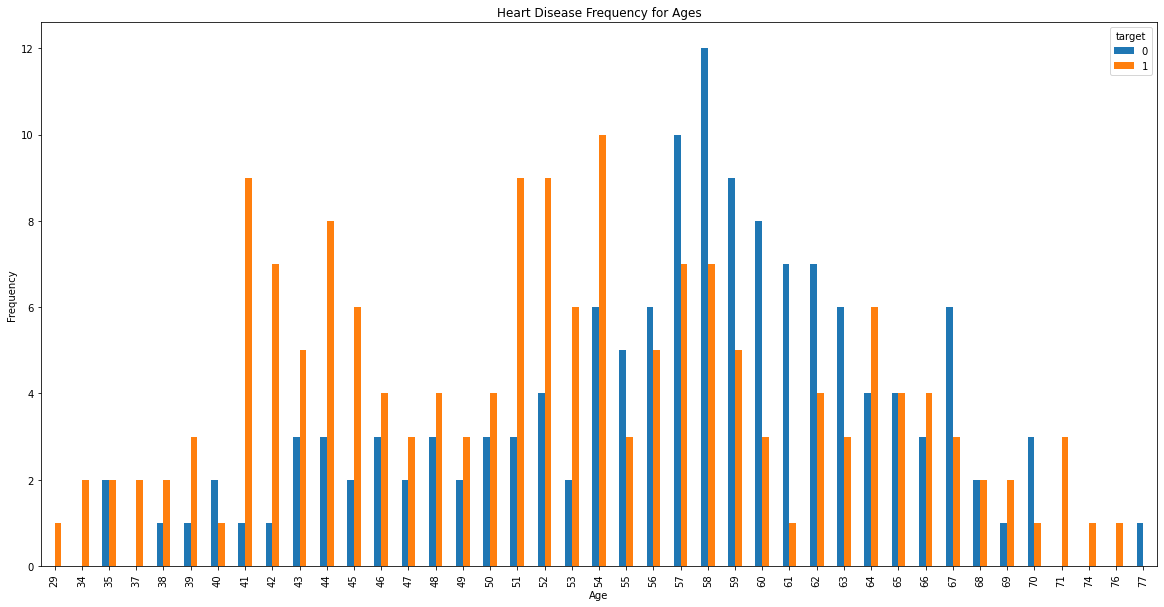

In [32]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

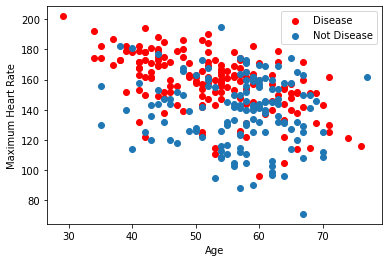

In [33]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Dari sini kita bisa makin jelas melihat pada rentang umur 40-60 pasien yang memiliki penyakit jantung mempunyai rata-rata Maximum Heart Rate diatas 155. Bandingkan dengan orang yang tidak memiliki penyakit jantung rata-rata Maximum Heart Rate pasien adalah 155

Ini menyiratkan bahwa sangat penting untuk menjaga detak jantung kita tetap rendah, untuk menjaga diri kita tetap sehat dan aman dari penyakit jantung yang berbahaya.

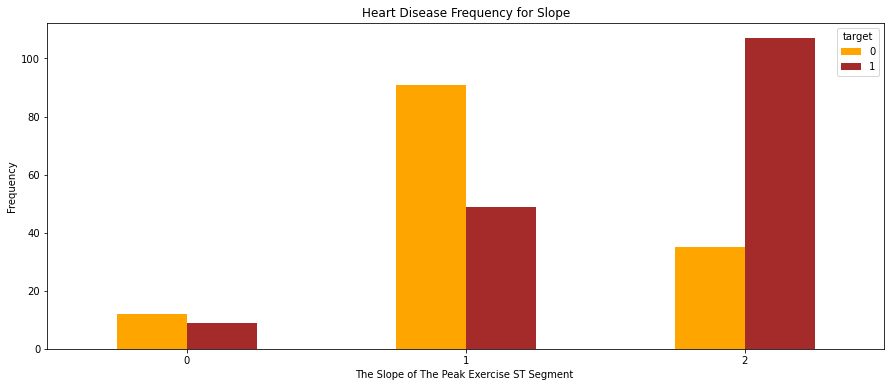

In [34]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['orange','brown' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

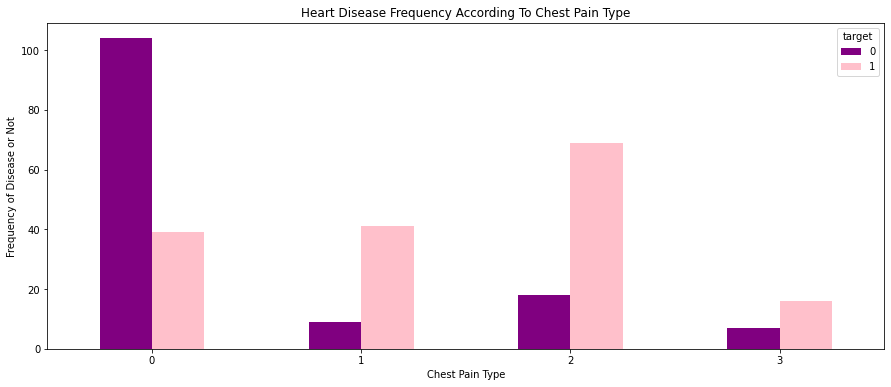

In [35]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['purple','pink'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

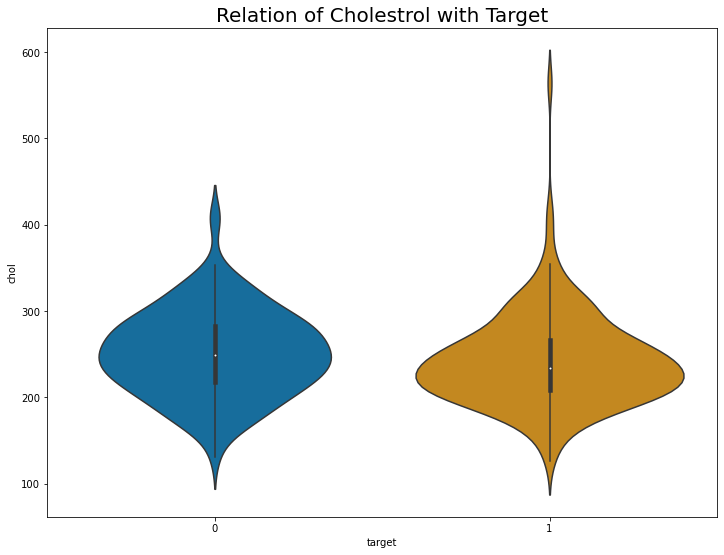

In [36]:
# cholestrol vs target

plt.figure(figsize = (12,9))
sns.violinplot(df['target'], df['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

Plot bivariat di atas antara kadar kolestrol dan target menunjukkan bahwa pasien yang kemungkinan besar menderita penyakit jantung memiliki kadar kolestrol yang lebih tinggi dibandingkan dengan pasien dengan target 0 (cenderung tidak menderita penyakit jantung.


Oleh karena itu, kita dapat menyimpulkan dari plot di atas bahwa kadar kolestrol memainkan peran penting dalam menentukan penyakit jantung. Kita semua harus mengendalikan kadar kolestrol kita sebaik mungkin.

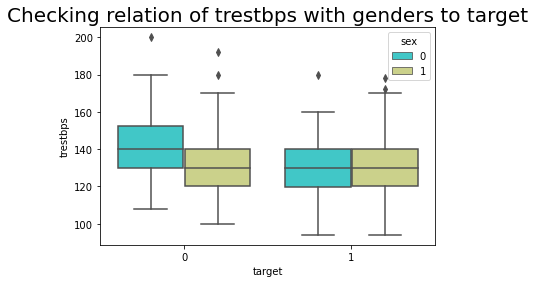

In [37]:
sns.boxplot(x = df['target'], y = df['trestbps'], hue = df['sex'], palette = 'rainbow')
plt.title('Checking relation of trestbps with genders to target', fontsize = 20, fontweight = 30)
plt.show()

Pada Box plot antara Target dan tresbps wrt Gender di atas, terlihat bahwa Wanita memiliki trestbps yang lebih tinggi daripada pria jika tidak menderita penyakit jantung, sedangkan pria dan wanita memiliki tresbps yang hampir sama jika menderita penyakit jantung. Juga, dalam kasus menderita penyakit jantung, pasien memiliki tresbps yang sedikit lebih rendah dibandingkan dengan pasien yang tidak menderita penyakit jantung.

In [38]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


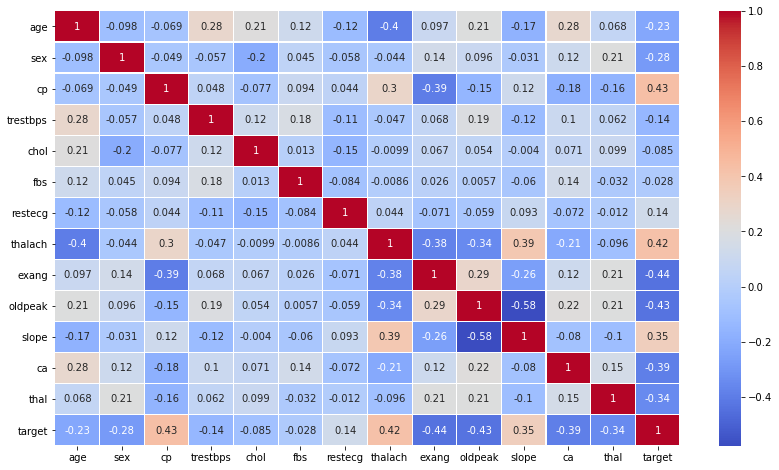

In [39]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

Peta panas di atas adalah untuk menunjukkan korelasi antara atribut yang berbeda dari dataset yang diberikan. Peta Panas di atas menunjukkan bahwa hampir semua fitur / atribut yang diberikan dalam dataset sangat kurang berkorelasi satu sama lain. Ini berarti kita harus menyertakan semua fitur, karena kita hanya dapat menghilangkan fitur yang memiliki korelasi dua atau lebih fitur sangat tinggi.

### Feature Engineering

In [40]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [41]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [42]:
df = pd.get_dummies(df)

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Splitting Data

In [44]:
X= df.drop(columns = 'target',axis=1)
y=df['target']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = .2, random_state = 42)

In [55]:
X_train.shape

(242, 13)

In [56]:
X_test.shape

(61, 13)

### Preprocessing - Scaling the features

In [47]:
from sklearn.preprocessing import RobustScaler

In [49]:
scaled = RobustScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = scaled.fit_transform(dataset[col_to_scale])

In [51]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Modelling 

#### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [112]:
from sklearn.model_selection import GridSearchCV

In [81]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [83]:
y_predict = model.predict(X_test)

In [84]:
accuracy_score(y_test, y_predict)

0.8032786885245902

In [85]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [86]:
cm = confusion_matrix(y_test, y_predict, labels=[1, 0])

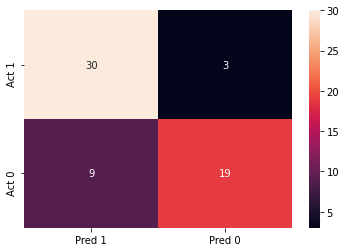

In [133]:
df = pd.DataFrame(cm,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df
sns.heatmap(df,annot=True )

#### Random Forest

In [135]:
rfclf = RandomForestClassifier(n_estimators = 30,max_depth = 10,random_state = 101)


rfclf.fit(X_train,y_train)
pred = rfclf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [136]:
param_grid = {
    'n_estimators' : [80,100,120,150],
    'max_depth' : [7,10,15,20],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split': [2,4,6,8]
}

gridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:  2.6min finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=10, n_estimators=30,
                                              random_state=101),
             param_grid={'max_depth': [7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [80, 100, 120, 150]},
             verbose=1)

In [137]:
gridsearch.best_params_

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 80}

In [138]:
rfclf = RandomForestClassifier(n_estimators = 150,max_depth = 7,min_samples_leaf = 4, min_samples_split = 2,random_state = 101)
rfclf.fit(X_train,y_train)
pred = rfclf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



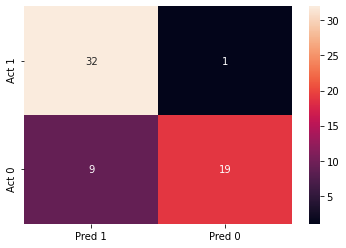

In [139]:
cm = confusion_matrix(y_test, pred, labels=[1, 0])
df = pd.DataFrame(cm,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
sns.heatmap(df,annot=True )

#### XGBoost

In [107]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_predXGB = model3.predict(X_test)

In [109]:
print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



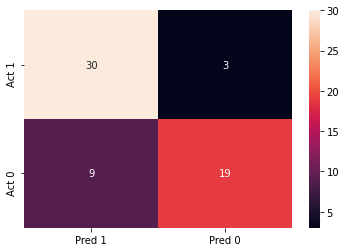

In [111]:
cm = confusion_matrix(y_test, y_predXGB, labels=[1, 0])
df = pd.DataFrame(cm,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
sns.heatmap(df,annot=True )

### Kesimpulan

Karena model ini memprediksi penyakit jantung, terlalu banyak kesalahan tipe II tidak disarankan. Negatif Palsu (mengabaikan kemungkinan penyakit ketika sebenarnya ada) lebih berbahaya daripada Positif Palsu dalam kasus ini. Oleh karena itu untuk meningkatkan sensitivitas, ambang batas dapat diturunkan. Model yang digunakan dengan hasil yang terbaik adalah random forest dengan tingkat akurasi sebesar 84% dan memiliki nilai False positif yang cukup baik.

### saran

Pihak Rumah sakit dapat menggunakan model ini untuk meminimalisir angka positif dan mengurangi angka positif orang yang terkena penyakit jantung.